# 10. Blinking bacteria: The repressilator enables self-sustaining oscillations

<hr>

**Design principle**

- Delayed ultrasensitive negative feedback loops can generate periodic oscillations in cells.

**Techniques**

- Composition of functions
- Linear stability analysis
- Linear stability diagrams
- Numerical calculation of a scalar fixed point
- Synthetic biology

**References**

- [Elowitz & Leibler, A synthetic oscillatory network of transcriptional regulators, *Nature*, 2000](https://doi.org/10.1038/35002125)
- [Synchronous long-term oscillations in a synthetic gene circuit, *Nature*, 2016](https://doi.org/10.1038/nature19841) 

<hr>

In [1]:
# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade colorcet watermark"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
# ------------------------------

import numpy as np
import scipy.integrate
import scipy.optimize

import bokeh.plotting
import bokeh.io

import colorcet

# We will use Matplotlib to make a 3D plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# Set to True to have access to fully interactive plots
fully_interactive_plots = False
notebook_url = "localhost:8888"

bokeh.io.output_notebook()

Loading BokehJS ...

<hr>

## Today's topic: designing cellular clocks

Today we will talk about how to build a clock in a living cell. More specifically, we will discuss a synthetic genetic clock circuit called the Repressilator ([Elowitz & Leibler, Nature, 2000](https://doi.org/10.1038/35002125)). We  first discuss the  roles of oscillators and clocks in natural biological systems, and then ask how one might go about designing a synthetic clock circuit that can operate in a living cell. To do this, we will use **linear stability analysis**, a broadly useful approach for analyzing diverse systems. We will also introduce the concept of a **limit cycle** attractor. 

## Clocks are essential for modern life and a metaphor for thinking about evolution

Modern life depends on time-keeping, which has been enabled by relentless invention and improvement of mechanical and electronic clocks. For example, a major turning point in global navigation was the development of portable clocks to measure longitude at sea. Notably, [John Harrison](https://en.wikipedia.org/wiki/John_Harrison) engineered a series of increasingly precise, and often very beautiful, clocks, or "marine chronometers," for this purpose. Even today, navigation remains dependent on clocks. We depend on the Global Positioning System (GPS) to navigate the streets of Los Angeles (usually over shorter distances and often slower speeds than the ships of Harrison's time). GPS in turn relies critically on precise atomic clocks installed in orbiting satellites. In biology, clocks have long been metaphorically identified with the perplexing mystery of how the undirected process of evolution could generate precise behaviors from seemingly "messy" molecular components. Dawkins's  1986 book, [The Blind Watchmaker](https://en.wikipedia.org/wiki/The_Blind_Watchmaker), personifies evolution as a watchmaker, who creates devices of astonishing precision (tissues and organisms) without being able to "see," much less plan, what she is doing. 

## Clocks function within cells and organisms

As living organisms, we are controlled by clocks of many kinds. 

**Circadian clocks** control our 24 hour cycles of sleep, hunger, and activity. Humans confined to environments with constant light, temperature, and other conditions exhibit free running activity cycles with [nearly 24hr periods](https://doi.org/10.1126/science.284.5423.2177)). Our body does not just respond to external inputs from light and temperature, but operates its own clock that enforces temporal organization on our bodies and minds. This is made most obvious when we fly across time zones and experience jet lag. The **cell cycle** represents another kind of oscillator that takes cells through repetitive cycles of growth and division. **Hormones** cycle on a range of timescales from hours to weeks. Plants contain circadian and **seasonal clocks** that control their movement and flowering, in response to time as well as light, temperature and other inputs. 

How do biological clocks work? In 1971, Ronald Konopka and Seymour Benzer, here at Caltech, [identified mutations that altered the circadian behavioral rhythms of fruit flies](https://doi.org/10.1073/pnas.68.9.2112). Over the next decades, biologists discovered key molecular components that enable these clocks to function, including transcription factors, light sensors, and other components, and worked out many aspects of the molecular mechanism of circadian oscillations. This work led to the [2017 nobel prize](https://www.nobelprize.org/prizes/medicine/2017/summary/) for Jeffrey Hall, Michael Rosbash, and Michael Young. 

In multicellular organisms, clocks synchronize between cells and organs. However, clocks are not solely a multicellular phenomenon: Even single cell cyanobacteria have precise, [cell-autonomous](https://doi.org/10.1038/nature02533) circadian clocks. And analysis of oscillations in individual mammalian cells indicates that they can still exhibit [circadian oscillations](https://doi.org/10.1016/0896-6273%2895%2990214-7), as one can see in [this movie](https://biocircuits.github.io/_images/independent_circadian_neurons.mov) and time traces of individual fibroblasts, showing robust cycling as well as cell-cell variability in period and phase, from D. Welsh, et al. ([*Current Biology* 2004](https://doi.org/10.1016/j.cub.2004.11.057)); pardon the lossy compression. Circadian behavior here is revealed through expression of a luminescent reporter gene knocked into the mPer2 circadian clock gene. 

<div style="margin: auto; width: 350px;">

<video src="figs/independent_circadian_neurons.mov" style="width: 350px;" controls>Your browser does not support display of this video.</video>

</div>

Time traces of individual cells from this movie showed astonishingly periodic oscillations:

<div style="width: 500px; margin: auto;">

![Welsh_circadian_single_cells_plotsonly_cropped](https://biocircuits.github.io/_images/Welsh_circadian_single_cells_plotsonly_cropped.png)

</div>

Efforts from many labs have identified the key biological components and interactions that generate circadian rhythms, culminating in the [2017 Nobel prize](https://www.nobelprize.org/prizes/medicine/2017/press-release/) to  Jeffrey C. Hall, Michael Rosbash and Michael W. Young "for their discoveries about how internal clocks and biological rhythms govern human life." 

This work revealed a complex clock containing many interacting protein components. However, astonishingly small circuits have the ability to generate oscillations. For example, after genetically identifying a single locus containing three clock genes in circadian cyanobacteria, Kondo and colleagues showed in 2005 that these [three proteins, plus ATP,](https://doi.org/10.1126/science.1108451) were sufficient to biochemically reconstitute clock-like oscillations of phosphorylation in vitro, with a period of about 24 hours. The circuit-level mechanism for these oscillations was subsequently explained by Rust, et al. in terms of [ordered phosphorylation and feedback](https://doi.org/10.1126/science.1148596).

## Can one design and build a synthetic clock inside a cell?

What kind of biological circuit is **sufficient** to generate periodic oscillations of a protein concentration in a single cell? Designing and building a clock "from scratch" is a **synthetic biology** approach that helps us identify the fundamental design principles underlying clock design, and address questions such as:

* How "hard" is it to build a biological clock? 
* How precise can a biological clock be?
* What minimum circuit designs are sufficient to generate self-sustaining oscillations?
* What tradeoffs exist between alternative clock circuit designs?

In addition, synthetic clocks provide modules for engineering more complex cellular behaviors. In the next chapter we will explore some applications of synthetic clocks.

## Limit cycles are ideal dynamical behaviors for clocks

Previously in this course, we have discussed only one kind of "attractor"—the stable fixed point. When a system sits at a stable fixed point, it does not change over time. (Actually, while true for a continuous system, biological systems are made of discrete molecules whose dynamics are subject to stochastic fluctuations, or noise, and therefore they do not really remain precisely at a single state. We will learn more about noise soon.) By contrast, in a functioning clock circuit, the state of the system constantly changes in a periodic fashion, progressing through a cyclic sequence of "phases" that returns it to its starting point without external input. 

For an ideal clock, perturbations that we might expect to occur in a cell, such as fluctuations in environmental conditions or intracellular components, should cause minimal perturbations to the clock dynamics, which should ultimately return to the same cycle rather than damp out. Such an ideal system "has to" oscillate, and cannot simply relax to a stable state. 

The kind of behavior we are looking for is called a [**limit cycle**](https://en.wikipedia.org/wiki/Limit_cycle). Stable limit cycles are defined by [Strogatz](http://www.stevenstrogatz.com/books/nonlinear-dynamics-and-chaos-with-applications-to-physics-biology-chemistry-and-engineering) as "isolated closed orbits", meaning that the system goes around the limit cycle, and that neighboring points ultimately feed into the limit cycle. As a result, if the system is perturbed a little bit away from the limit cycle, it will tend to return back to it, as shown here:

<div style="width: 500px; margin: auto;">

![limit cycles](https://biocircuits.github.io/_images/limit_cycles.png)

</div>

Note that one can also have unstable limit cycles. 

As Strogatz notes, linear systems such as a frictionless pendulum can produce a family of orbits but not a limit cycle, because multiplying any solution of

\begin{align}
\frac{\mathrm{d}\mathbf{x}}{\mathrm{d}t} =\mathsf{A} \cdot \mathbf{x}
\end{align}

by a constant produces another solution. Limit cycle oscillators are thus inherently non-linear systems.

## Design requirements for the synthetic clock:

This brings us to our first design requirement for the synthetic clock: **it should produce limit cycle oscillations**.

In addition, clock circuit should also **oscillate across a broad range of biochemical parameter values.**  This is because we may not be able to exactly know or control many cellular parameters, which can and do fluctuate, as we will discuss in the context of stochastic "noise."


## Ideal components: composable, orthogonal, well-characterized 

Among the best characterized regulatory components in biology are prokaryotic (bacterial) transcriptional repressors and their cognate target promoters. These components are  **modular**, **orthogonal**, and **composable**. By modular, we mean that they can be taken out of their natural context and used to generate a new regulatory circuit. By orthogonal, we mean that a variety of variants exist that operate similarly, but independently. Thus, different repressors bind to distinct DNA binding sites. Composability is a stronger form of modularity in which a set of components can regulate each other in the  same way. LEGOs are a familiar example of composability: each of the standard bricks can be stuck onto a similar type of brick from below and above. Transcription factors are composable because any one can be engineered to regulate any other simply by combining corresponding target promoter sequences with open reading frames for the transcription factors. 

(Transcriptional activators, which we have already encountered, are also excellent components for synthetic design although, at the time this work was done, there were generally fewer examples that were as well-understood as repressors. Therefore, we will focus below on a circuit design built exclusively from repressors).


## Design strategy:

Based on the considerations above, we will try to design a biological circuit that generates **limit cycle oscillations** across a **broad range of biochemical parameter values** using a set of well-characterized, composable, and orthogonal **transcriptional repressors**. 

One of the first designs one can imagine building with repressors is a  "rock-scissors-paper" feedback loop composed of three repressors, each of which represses the next one, in a cycle:

<div style="width: 200px; margin: auto;">

![repressilator diagram](https://biocircuits.github.io/_images/simple_repressilator_diagram.png)

</div>


This diagram refers to three specific repressors, TetR, λ cI, and LacI. We will discuss the rationale for choosing these below, after we work out the design. For now, the names of the repressors are unimportant, so we will refer to them as repressors 1, 2, and 3. Repressor 1 represses production of repressor 2, which in turn represses production of repressor 3.  Finally, repressor 3 represses production or repressor 1, completing the loop.

<div style="width: 150px; margin: auto;">

![simple repressilator numbers](https://biocircuits.github.io/_images/simple_repressilator_numbers.png)

</div>


This design is a three-component negative feedback loop (analogous to a "three ring oscillator" in electronics). If one were to turn up the level of the first protein in this system, it would lead to a decrease in the second, which would cause an increase in the third, and finally a decrease in the first. Thus, one can see, intuitively, that this system produces a negative feedback that tends to push back in the opposite direction to any perturbation, after the delay required to propagate the perturbation around the loop. 

We can try to work out the dynamics of this system by intuitive reasoning. We might achieve a limit cycle oscillation: Say that repressor 1 is present at a high protein concentration, while repressors 2 and 3 are low. The high concentration of repressor 1 will limit expression of repressor 2, keeping its level low. This means that repressor 3 is free to be expressed.  As its concentration grows, it will start to repress repressor 1.  As repressor 1 goes down, repressor 2 is expressed in higher numbers.  The increased repressor 2 concentration leads to less repressor 3.  Then, repressor 1 comes back up again.  So, we see a cycle, where repressor 1 is high, then repressor 3, and finally repressor 2. 

However, this behavior is by no means guaranteed. We might equally well just get a stable steady state, where all three repressors evolve to intermediate values, each sufficient to keep its target repressor at the appropriate level to maintain its target at its steady-state level. This behavior would be much more boring. 

In fact, both behaviors are possible.

So, our questions are now: 

1. What kinds of behaviors would this circuit be expected to produce?
2. How can we engineer the circuit to favor, or better yet, guarantee, limit cycle oscillations?

## Dynamical equations for the repressilator

To analyze the repressilator, we will, as usual, write down a set of differential equations for each of the proteins. For simplicity, we will assume perfect symmetry among the species, with each one having identical biochemical properties (this will not be true in the real system). While we initially consider only protein dynamics here, later on, we will ask how including mRNA modifies the conclusions.

\begin{align}
\frac{\mathrm{d}x_1}{\mathrm{d}t} &= \frac{\beta}{1 + (x_3/k)^n} - \gamma x_1, \\[1em]
\frac{\mathrm{d}x_2}{\mathrm{d}t} &= \frac{\beta}{1 + (x_1/k)^n} - \gamma x_2, \\[1em]
\frac{\mathrm{d}x_3}{\mathrm{d}t} &= \frac{\beta}{1 + (x_2/k)^n} - \gamma x_3. 
\end{align}

In dimensionless units, where protein concentrations are measured in units of $k$, and time is measured in units of $\gamma^{-1}$, this becomes

\begin{align}
\frac{\mathrm{d}x_i}{\mathrm{d}t} &= \frac{\beta}{1 + x_j^n} - x_i, \quad \text{ with } (i,j) \text{ pairs } (1,3), (2,1), (3,2).
\end{align}

Note that $\beta$ has been redefined as $\beta \leftarrow \beta/k\gamma$.

## Temporal dynamics

We can integrate the dynamical equations to see the levels of the respective proteins using interactive plotting of the result so we can see how the dynamics depend on the parameters $\beta$ and $n$. We can plot the dynamics with time along the horizontal axis and each of the three species varying in time. Oscillations are clear when the curves go up and down repeatedly in time.


Alternatively, it is also instructive to plot the trajectory of the system as a projection in the $x_2$-$x_1$ plane (or in either of the other two planes this three-dimensional system can be projected onto). When the fixed point is stable, the trajectory in the $x_2$-$x_1$ plane spirals into the fixed point. When it is unstable, the trajectory spirals away from it, eventually cycling around the fixed point to join a limit cycle, corresponding to oscillations.

The layout below shows both plots. For sufficiently large $\beta$ and $n$, we see beautiful 3-phase oscillations. A few things to notice: 

* If $n<2$, oscillations diminish over time.
* If $n>2$, sustained oscillations occur, but only for large enough $\beta$
* If $n=2$, see what happens...

*Note that to interact with this plot, you need to be running this Jupyter notebook. To interact, adjust the* `fully_interactive_plots` *variable in the code cell at the top of the notebook.*

In [2]:
def repressilator_rhs(x, t, beta, n):
    """
    Returns 3-array of (dx_1/dt, dx_2/dt, dx_3/dt)
    """
    x_1, x_2, x_3 = x

    return np.array(
        [
            beta / (1 + x_3 ** n) - x_1,
            beta / (1 + x_1 ** n) - x_2,
            beta / (1 + x_2 ** n) - x_3,
        ]
    )


# Initial condiations
x0 = np.array([1, 1, 1.2])

# Number of points to use in plots
n_points = 1000

# Widgets for controlling parameters
beta_slider = bokeh.models.Slider(title="β", start=0, end=100, step=0.1, value=10)
n_slider = bokeh.models.Slider(title="n", start=1, end=5, step=0.1, value=3)
t_max_slider = bokeh.models.Slider(title="t_max", start=1, end=100, step=1, value=40)

# Solve for species concentrations
def _solve_repressilator(beta, n, t_max):
    t = np.linspace(0, t_max, n_points)
    x = scipy.integrate.odeint(repressilator_rhs, x0, t, args=(beta, n))

    return t, x.transpose()


# Obtain solution for plot
t, x = _solve_repressilator(beta_slider.value, n_slider.value, t_max_slider.value)

# Build the plot
colors = colorcet.b_glasbey_category10[:3]

p_rep = bokeh.plotting.figure(
    frame_width=550, frame_height=200, x_axis_label="t", x_range=[0, t_max_slider.value]
)

cds = bokeh.models.ColumnDataSource(data=dict(t=t, x1=x[0], x2=x[1], x3=x[2]))
labels = dict(x1="x₁", x2="x₂", x3="x₃")
for color, x_val in zip(colors, labels):
    p_rep.line(
        source=cds,
        x="t",
        y=x_val,
        color=color,
        legend_label=labels[x_val],
        line_width=2,
    )

p_rep.legend.location = "top_left"


# Set up plot
p_phase = bokeh.plotting.figure(
    frame_width=200, frame_height=200, x_axis_label="x₁", y_axis_label="x₂",
)

p_phase.line(source=cds, x="x1", y="x2", line_width=2)


if fully_interactive_plots:
    # Set up callbacks
    def _callback(attr, old, new):
        t, x = _solve_repressilator(
            beta_slider.value, n_slider.value, t_max_slider.value
        )
        cds.data = dict(t=t, x1=x[0], x2=x[1], x3=x[2])
        p_rep.x_range.end = t_max_slider.value

    beta_slider.on_change("value", _callback)
    n_slider.on_change("value", _callback)
    t_max_slider.on_change("value", _callback)

    # Build layout
    repressilator_layout = bokeh.layouts.column(
        p_rep,
        bokeh.layouts.Spacer(height=10),
        bokeh.layouts.row(
            p_phase,
            bokeh.layouts.Spacer(width=70),
            bokeh.layouts.column(beta_slider, n_slider, t_max_slider, width=150),
        ),
    )

    # Build the app
    def repressilator_app(doc):
        doc.add_root(repressilator_layout)

    bokeh.io.show(repressilator_app, notebook_url=notebook_url)
else:
    beta_slider.disabled = True
    n_slider.disabled = True
    t_max_slider.disabled = True
    
    # Build layout
    repressilator_layout = bokeh.layouts.column(
        p_rep,
        bokeh.layouts.Spacer(height=10),
        bokeh.layouts.row(
            p_phase,
            bokeh.layouts.Spacer(width=70),
            bokeh.layouts.column(
                bokeh.layouts.column(beta_slider, n_slider, t_max_slider, width=150),
                bokeh.models.Div(
                    text="""
<p>Sliders are inactive. To get active sliders, re-run notebook with
<font style="font-family:monospace;">fully_interactive_plots = True</font>
in the first code cell.</p>
        """,
                    width=250,
                ),
            ),
        ),
    )

    bokeh.io.show(repressilator_layout)

Finally, here is a simple three-dimensional plot of the limit cycle in the space of the three protein concentrations.

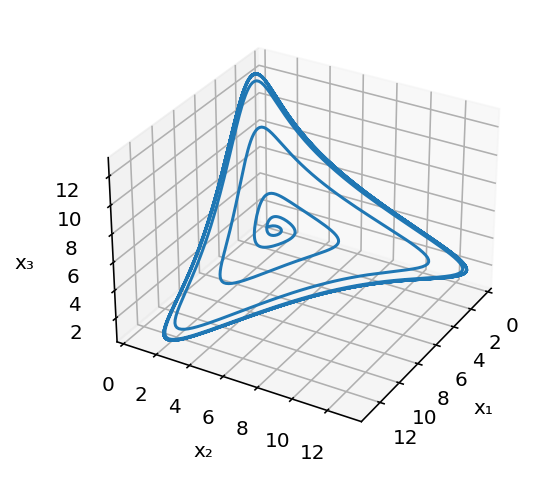

In [3]:
# Resolve problem for β = 20 and n = 3
t = np.linspace(0, 50, 1000)
x = scipy.integrate.odeint(repressilator_rhs, x0, t, args=(20, 3))

# Generate the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.view_init(30, 30)
ax.plot(x[:, 0], x[:, 1], x[:, 2])
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("x₃");

### What conditions are necessary and sufficient for oscillations?

Why does the system oscillate for some values of $n$ and $\beta$ but not others? To find out, we need to use linear stability analysis to see how the values of the key biochemical parameters, $\beta$ and $n$ control oscillations. 

As a first step, we will identify fixed points by solving $\frac{\mathrm{d}x_i}{\mathrm{d}t} = 0 $ for each $x_i$. 

\begin{align}
x_1 &= \frac{\beta}{1+x_3^n}, \\[1em]
x_2 &= \frac{\beta}{1+x_1^n}, \\[1em]
x_3 &= \frac{\beta}{1+x_2^n}.
\end{align}

We can substitute the expression for $x_3$ into that for $x_1$ to get

\begin{align}
x_1 = \frac{\beta}{1 + \left(\displaystyle{\frac{\beta}{1 + x_2^n}}\right)^n}.
\end{align}

We can then substitute the expression for for $x_2$ to get

\begin{align}
x_1 = \frac{\beta}{1 + \displaystyle{\left(\frac{\beta}{1 + \left(\displaystyle{\frac{\beta}{1+x_1^n}}\right)^n}\right)^n}}.
\end{align}

This unwieldy expression can be written more conveniently as a **composition of functions**.  Specifically,

\begin{align}
x_1 = f(f(f(x_1))) \equiv f\!f\!f(x_1),
\end{align}

where
\begin{align}
f(x) = \frac{\beta}{1+x^n}.
\end{align}

By symmetry, this relation holds for repressors 2 and 3 as well, so we have

\begin{align}
x_i = f\!f\!f(x_i).
\end{align}

Writing the relationship for the fixed point with a composition of functions is useful because we can easily compute the derivatives of the composite function using the chain rule.

\begin{align}
(f\!f\,)'(x) &= f'(f(x))\cdot f'(x), \\[1em]
(f\!f\!f\,)'(x) &= f'(f\!f(x)) \cdot (f\!f\,)'(x) =  f'(f(f(x))) \cdot f'(f(x)) \cdot f'(x).
\end{align}

Now, since $f(x)$ is monotonically decreasing, $f'(x) < 0$, and also $f'(f(x)) < 0$.  This means that $f\!f'(x) > 0$, so $f\!f(x)$ is monotonically increasing. Now, $f'(f\!f(x)) < 0$, since $f'(\text{anything monotonically increasing}) < 0$. This means that $f\!f\!f(x)$ is monotonically decreasing.  Since $x_i$ is increasing, there is a single fixed point with $x = f\!f\!f(x)$. This is more clear if we look at a plot.

In [4]:
# Parameters
beta, n = 3, 2

# f(x)
f = lambda x: beta / (1 + x ** n)

# Make composition of functions
x = np.linspace(0, 3, 200)
fff = f(f(f(x)))

# Show plot
p = bokeh.plotting.figure(
    height=300, width=350, x_axis_label="x", x_range=[0, 3], y_range=[0, 3]
)
p.line(x, x, line_width=2, legend_label="x")
p.line(x, fff, line_width=2, color="orange", legend_label="fff(x)")
p.legend.location = "center_right"

bokeh.io.show(p)

Because the time derivative of $x_1$, $x_2$ and $x_3$ _all_ vanish at the fixed point, and we have shown that the fixed point is unique, we have
 
\begin{align}
x_1 = x_2 = x_3 \equiv x_0 = \frac{\beta}{1 + x_0^n},
\end{align}

or

\begin{align}
\beta = x_0(1+x_0^n).
\end{align}

We have one fixed point. If it is stable, then the system will sit there, constant in time. On the other hand, if it is unstable, then there is the potential for limit cycle oscillations. The question is: under what conditions is this fixed point unstable?


## Linear stability analysis

Following is a minimal introduction to the technique of linear stability analysis, which is discussed in greater depth in [Strogatz](http://www.stevenstrogatz.com/books/nonlinear-dynamics-and-chaos-with-applications-to-physics-biology-chemistry-and-engineering) The idea is to locally approximate a *nonlinear* dynamical system by its Taylor series to first order near the fixed point, and then examine the behavior of the resulting simpler linear system. The Hartman-Grobman theorem (which we will not derive here) ensures that the linearized system faithfully represents the phase portrait of the full nonlinear system near the fixed point.

Say we have a dynamical system with variables $\mathbf{u}$ with

\begin{align}
\frac{\mathrm{d}\mathbf{u}}{\mathrm{d}t} = \mathbf{f}(\mathbf{u}),
\end{align}

where $\mathbf{f}(\mathbf{u})$ is a vector-valued function, i.e.,

\begin{align}
\mathbf{f}(\mathbf{u}) = (f_1(u_1, u_2, \ldots), f_2(u_1, u_2, \ldots), \ldots).
\end{align}

Assuming there is a fixed point $\mathbf{u}_0$, linear stability analysis proceeds with the following steps:

**1.** Linearize about $\mathbf{u}_0$, defining $\delta\mathbf{u} = \mathbf{u} - \mathbf{u}_0$.  To do this, expand $f(\mathbf{u})$ in a Taylor series about $\mathbf{u}_0$ to first order.
 
\begin{align}
\mathbf{f}(\mathbf{u}) = \mathbf{f}(\mathbf{u}_0) + \nabla \mathbf{f}(\mathbf{u}_0)\cdot \delta\mathbf{u} + \cdots,
\end{align}

where $\nabla \mathbf{f}(\mathbf{u}_0) \equiv \mathsf{A}$ is the Jacobi matrix evaluated at $\mathbf{u}_0$,

\begin{align}
\nabla \mathbf{f}(\mathbf{u}_0) \equiv \mathsf{A} = \left.\begin{pmatrix}
\frac{\partial f_1}{\partial u_1} & \frac{\partial f_1}{\partial u_2} & \cdots \\[0.5em]
\frac{\partial f_2}{\partial u_1} & \frac{\partial f_2}{\partial u_2} & \cdots \\
\vdots & \vdots & \ddots
\end{pmatrix}\right|_{\mathbf{\, u}_0}
\end{align}

Thus, we have

\begin{align}
\frac{\mathrm{d}\mathbf{u}}{\mathrm{d}t} = \frac{\mathrm{d}\mathbf{u}_0}{\mathrm{d}t} + \frac{\mathrm{d}\delta\mathbf{u}}{\mathrm{d}t}
= \mathbf{f}(\mathbf{u}_0) + \mathsf{A} \cdot \delta\mathbf{u} + \text{higher order terms}.
\end{align}

Since

\begin{align}
\frac{\mathrm{d}\mathbf{u}_0}{\mathrm{d}t} = \mathbf{f}(\mathbf{u}_0) = 0,
\end{align}

we have, to linear order,

\begin{align}
\frac{\mathrm{d}\delta\mathbf{u}}{\mathrm{d}t} = \mathsf{A} \cdot \delta\mathbf{u}.
\end{align}

This is now a system of _linear_ ordinary differential equations. If this were a one-dimensional system, the solution would be an exponential $\delta u \propto \mathrm{e}^{\lambda u}$. In the multidimensional case, the growth rate $\lambda$ is replaced by a set of eigenvalues of $\mathsf{A}$ that represent the growth rates in different directions, given by the eigenvectors of $\mathsf{A}$
 
**2.** Compute the eigenvalues, $\lambda$ of $\mathsf{A}$.

**3.** Determine the stability of the fixed point using the following rules.

- If $\mathrm{Re}(\lambda) < 0$ for all $\lambda$, then the fixed point $\mathbf{u}_0$ is linearly stable.
- If $\mathrm{Re}(\lambda) > 0$ for any $\lambda$, then the fixed point $\mathbf{u}_0$ is linearly unstable. 
- If $\mathrm{Im}(\lambda) \ne 0$ for a linearly unstable fixed point, the trajectories spiral out, potentially leading to oscillatory dynamics.
- If $\mathrm{Re}(\lambda) = 0$ for one or more $\lambda$, with the rest having $\mathrm{Re}(\lambda) < 0$, then the fixed point $\mathbf{u}_0$ lies at a bifurcation.

So, if we can assess the dynamics of the linearized system near the fixed point, we can get an idea what is happening with the full system.

To do the linearization, we need to compute Taylor expansions of Hill functions. We do this so often in this course, that we will write them here and/or memorize for future use.

\begin{align}
\frac{x^n}{1+x^n} &= \frac{x_0^n}{1+x_0^n} + \frac{n x_0^{n-1}}{(1+x_0^n)^2}\,\delta x + \text{higher order terms}, \\[1em]
\frac{1}{1+x^n} &= \frac{1}{1+x_0^n} - \frac{n x_0^{n-1}}{(1+x_0^n)^2}\,\delta x + \text{higher order terms}.
\end{align}

In the following we only need the second, repressing case.

## Linear stability analysis for the repressilator

To perform linear stability analysis for the repressilator, we begin by writing the linearized system.

\begin{align}
\frac{\mathrm{d}\delta x_1}{\mathrm{d}t} &\approx -\frac{\beta n x_0^{n-1}}{(1+x_0^n)^2}\,\delta x_3 - \delta x_1, \\[1em]
\frac{\mathrm{d}\delta x_2}{\mathrm{d}t} &\approx -\frac{\beta n x_0^{n-1}}{(1+x_0^n)^2}\,\delta x_1 - \delta x_2, \\[1em]
\frac{\mathrm{d}\delta x_3}{\mathrm{d}t} &\approx -\frac{\beta n x_0^{n-1}}{(1+x_0^n)^2}\,\delta x_2 - \delta x_3.
\end{align}

Defining

\begin{align}
a = \frac{\beta n x_0^{n-1}}{(1+x_0^n)^2},
\end{align}

we can write this in matrix form as

\begin{align}
\frac{\mathrm{d}}{\mathrm{d}t}\begin{pmatrix}
\delta x_1 \\
\delta x_2 \\
\delta x_3
\end{pmatrix}
= \mathsf{A}\cdot\begin{pmatrix}
\delta x_1 \\
\delta x_2 \\
\delta x_3
\end{pmatrix},
\end{align}

with

\begin{align}
\mathsf{A} = -\begin{pmatrix}
1 & 0 & a \\
a & 1 & 0 \\
0 & a & 1
\end{pmatrix}.
\end{align}

To compute the eigenvalues of $\mathsf{A}$, we compute the characteristic polynomial using cofactors,

\begin{align}
(1+\lambda)(1+\lambda)^2 + a(a^2) = (1+\lambda)^3 + a^3 = 0.
\end{align}

This is solved to give

\begin{align}
\lambda = -1 + a \sqrt[3]{-1}.
\end{align}

Recalling that there are three cube roots of $-1$, we get our three eigenvalues.

\begin{align}
&\lambda = -1 - a, \\[1em]
&\lambda = -1 + \frac{a}{2}(1 + i\sqrt{3}),\\[1em]
&\lambda = -1 + \frac{a}{2}(1-i\sqrt{3}).
\end{align}

The first eigenvalue is always real and negative.  The second two have a positive real part if $a > 2$;

\begin{align}
a = \frac{\beta n x_0^{n-1}}{(1 + x_0^n)^2} > 2.
\end{align}

Now, we previously derived that the fixed point $x_0$ satisfies

\begin{align}
\beta = x_0(1+x_0^n),
\end{align}

so

\begin{align}
a = \frac{\beta n x_0^{n-1}}{(1 + x_0^n)^2} = \frac{n x_0^n}{1 + x_0^n}.
\end{align}

So, $a>2$ only if $n > 2$, meaning that we _must_ have ultrasensitivity for the fixed point to be unstable.

At the bifurcation,

\begin{align}
a = \frac{n x_0^n}{1+x_0^n} = 2,
\end{align}

so

\begin{align}
x_0^n = \frac{2}{n-2}.
\end{align}

Again using $\beta = x_0(1+x_0^n)$, we can write

\begin{align}
\beta = \frac{n}{2}\left(\frac{n}{2} - 1\right)^{-\frac{n+1}{n}}
\end{align}

at the bifurcation.  So, for $n > 2$ and

\begin{align}
\beta > \frac{n}{2}\left(\frac{n}{2} - 1\right)^{-\frac{n+1}{n}},
\end{align}

we have imaginary eigenvalues with positive real parts. This is therefore an **oscillatory instability**.

## Ensuring oscillations

It is useful to make a **linear stability diagram**, which is a map of parameter space highlighting stable and unstable regions.  We know the bifurcation line is

\begin{align}
\beta = \frac{n}{2}\left(\frac{n}{2} - 1\right)^{-\frac{n+1}{n}}
\end{align}

We can plot this line and delineate the regions of stability and instability. It clearly shows that, from a design point of view, it is desirable to make both $n$ and $\beta$ as high as possible.

In [5]:
# Get bifurcation line
n = np.linspace(2.01, 5, 200)
beta = n / 2 * (n / 2 - 1) ** (-(1 + 1 / n))

# Build the plot
p = bokeh.plotting.figure(
    height=300,
    width=400,
    x_axis_label="n",
    y_axis_label="β",
    y_axis_type="log",
    x_range=[2, 5],
    y_range=[1, 2000],
)
p.patch(
    np.append(n, n[-1]), np.append(beta, beta[0]), color="lightgray", alpha=0.7
)
p.line(n, beta, line_width=4, color="black")
p.text(x=2.1, y=2, text=["stable"])
p.text(x=2.5, y=100, text=["unstable (limit cycle oscillations)"])

bokeh.io.show(p)

## Intuition from the protein-only model

This analysis shows two conditions that favor oscillations:

* High Hill coefficients 
* Strong promoters

In fact, these results can be understood intuitively: oscillations occur when the feedback "overshoots." The sharper and stronger the response as one goes around the complete feedback loop, the longer and higher a pulse in one factor can grow before it is, inevitably, yanked back down by the feedback. Consistent with this view, there is a [tradeoff](https://catalog.princeton.edu/catalog/2244277) between the length of the cycle (number of repressors in the loop) and the minimum Hill coefficient required. 

## Including mRNA in the model provides additional insights

In the above analysis, we only considered the three proteins themselves, and we neglected the mRNA dynamics. However, it would be of interest to understand how mRNA properties like stability and translation rate affect whether and how the circuit oscillations. Therefore, we will add additional equations for each mRNA species. We will continue to assume symmetry among species, with all mRNAs sharing the same parameter values. With this assumption, the dynamical equations become:

\begin{align}
\frac{\mathrm{d}m_i}{\mathrm{d}t} &= \alpha + \frac{\beta_m}{1 + (x_j/k)^n} - \gamma_m m_i,\\[1em]
\frac{\mathrm{d}x_i}{\mathrm{d}t} &= \beta_p m_i - \gamma_p x_i, \\[1em]
\end{align}

with $i,j$ pairs $(1,3), (2,1), (3,2)$. Here, we have introduced $\rho$ to allow for leaky transcription. In dimensionless units, these equations are

\begin{align}
\frac{\mathrm{d}m_i}{\mathrm{d}t} &= \beta\left(\rho + \frac{1}{1 + x_j^n}\right) - m_i, \\[1em]
\gamma^{-1}\,\frac{\mathrm{d}x_i}{\mathrm{d}t} &= m_i - x_i,
\end{align}

Here,
* $\gamma \equiv \gamma_p/\gamma_m$ is the ratio of the two timescales in the system–the protein and mRNA degradation/decay rates.
* $\beta = \beta_m\beta_p/\gamma_m\gamma_p k$ is a dimensionless promoter strength.
* $\rho = \alpha/\beta_m$ is the relative strength of leaky versus regulated expression.

As above, to start, we will solve this system numerically and explore its dynamics for different parameter values. 

*Note that to interact with this plot, you need to be running this Jupyter notebook; the plot is lost in the static HTML rendering.*

In [6]:
# Sliders
beta_slider_6 = bokeh.models.Slider(
    title="β",
    start=0,
    end=4,
    step=0.1,
    value=1,
    format=bokeh.models.FuncTickFormatter(code="return Math.pow(10, tick).toFixed(2)"),
)
gamma_slider = bokeh.models.Slider(
    title="γ",
    start=-3,
    end=0,
    step=0.1,
    value=0,
    format=bokeh.models.FuncTickFormatter(code="return Math.pow(10, tick).toFixed(3)"),
)
rho_slider = bokeh.models.Slider(
    title="ρ",
    start=-6,
    end=0,
    step=0.1,
    value=-3,
    format=bokeh.models.FuncTickFormatter(code="return Math.pow(10, tick).toFixed(6)"),
)
n_slider_6 = bokeh.models.Slider(title="n", start=1, end=5, step=0.1, value=3)
t_max_slider_6 = bokeh.models.Slider(
    title="t_max", start=1, end=1000, step=1, value=100
)


def repressilator_rhs_6(mx, t, beta, gamma, rho, n):
    """
    Returns 6-array of (dm_1/dt, dm_2/dt, dm_3/dt, dx_1/dt, dx_2/dt, dx_3/dt)
    """
    m_1, m_2, m_3, x_1, x_2, x_3 = mx
    return np.array(
        [
            beta * (rho + 1 / (1 + x_3 ** n)) - m_1,
            beta * (rho + 1 / (1 + x_1 ** n)) - m_2,
            beta * (rho + 1 / (1 + x_2 ** n)) - m_3,
            gamma * (m_1 - x_1),
            gamma * (m_2 - x_2),
            gamma * (m_3 - x_3),
        ]
    )


# Initial condiations
x0_6 = np.array([1, 1.1, 1.2, 0, 0, 0])

# Number of points to use in plots
n_points = 1000


# Solve for species concentrations
def _solve_repressilator_6(log_beta, log_gamma, log_rho, n, t_max):
    beta = 10 ** log_beta
    gamma = 10 ** log_gamma
    rho = 10 ** log_rho
    t = np.linspace(0, t_max, n_points)
    x = scipy.integrate.odeint(repressilator_rhs_6, x0_6, t, args=(beta, gamma, rho, n))
    m1, m2, m3, x1, x2, x3 = x.transpose()
    return t, m1, m2, m3, x1, x2, x3


t, m1, m2, m3, x1, x2, x3 = _solve_repressilator_6(
    beta_slider_6.value,
    gamma_slider.value,
    rho_slider.value,
    n_slider_6.value,
    t_max_slider_6.value,
)

cds_6 = bokeh.models.ColumnDataSource(
    dict(t=t, m1=m1, m2=m2, m3=m3, x1=x1, x2=x2, x3=x3)
)

p_rep_6 = bokeh.plotting.figure(
    frame_width=500,
    frame_height=200,
    x_axis_label="t",
    x_range=[0, t_max_slider_6.value],
)

colors = bokeh.palettes.d3["Category20"][6]
m1_line = p_rep_6.line(source=cds_6, x="t", y="m1", line_width=2, color=colors[1])
x1_line = p_rep_6.line(source=cds_6, x="t", y="x1", line_width=2, color=colors[0])
m2_line = p_rep_6.line(source=cds_6, x="t", y="m2", line_width=2, color=colors[3])
x2_line = p_rep_6.line(source=cds_6, x="t", y="x2", line_width=2, color=colors[2])
m3_line = p_rep_6.line(source=cds_6, x="t", y="m3", line_width=2, color=colors[5])
x3_line = p_rep_6.line(source=cds_6, x="t", y="x3", line_width=2, color=colors[4])

legend_items = [
    ("m₁", [m1_line]),
    ("x₁", [x1_line]),
    ("m₂", [m2_line]),
    ("x₂", [x2_line]),
    ("m₃", [m3_line]),
    ("x₃", [x3_line]),
]
legend = bokeh.models.Legend(items=legend_items)

p_rep_6.add_layout(legend, "right")

# Build the layout
layout = bokeh.layouts.column(
    bokeh.layouts.row(
        beta_slider_6,
        gamma_slider,
        rho_slider,
        n_slider_6,
        t_max_slider_6,
        width=575,
    ),
    bokeh.layouts.Spacer(height=10),
    p_rep_6,
)


if fully_interactive_plots:
    # Set up callbacks
    def _callback_6(attr, old, new):
        t, m1, m2, m3, x1, x2, x3 = _solve_repressilator_6(
            beta_slider_6.value,
            gamma_slider.value,
            rho_slider.value,
            n_slider_6.value,
            t_max_slider_6.value,
        )
        cds_6.data = dict(t=t, m1=m1, m2=m2, m3=m3, x1=x1, x2=x2, x3=x3)
        p_rep_6.x_range.end = t_max_slider_6.value

    beta_slider_6.on_change("value", _callback_6)
    gamma_slider.on_change("value", _callback_6)
    rho_slider.on_change("value", _callback_6)
    n_slider_6.on_change("value", _callback_6)
    t_max_slider_6.on_change("value", _callback_6)

    # Build the app
    def repressilator_app_6(doc):
        doc.add_root(layout)

    bokeh.io.show(repressilator_app_6, notebook_url=notebook_url)
else:
    beta_slider_6.disabled = True
    gamma_slider.disabled = True
    rho_slider.disabled = True
    n_slider_6.disabled = True
    t_max_slider_6.disabled = True
    
    layout = bokeh.layouts.column(bokeh.models.Div(
                text="""
<p>Sliders are inactive. To get active sliders, re-run notebook with
<font style="font-family:monospace;">fully_interactive_plots = True</font>
in the first code cell.</p>
        """), layout)
    
    bokeh.io.show(layout)

Using a similar technique as for the simplified three-component system, we can show that there is a unique fixed point with $m_i = x_i = x_0$ for all $i$ with

\begin{align}
(x_0 - \beta\rho)(1+x_0^n) = \beta.
\end{align}

We can perform linear stability for this fixed point. The linear stability matrix is now 6 by 6 rather than 3 by 3. Nonetheless, we can derive analytically that when we get an eigenvalue with a positive real part, it also has a nonzero imaginary part, which means that the instability is oscillatory. We get (not derived here; can you do it?) an eigenvalue with positive real part when

\begin{align}
\left(\sqrt{\gamma} + \sqrt{\gamma^{-1}}\right)^2 < \frac{3f_0^2}{4+2f_0},
\end{align}

where

\begin{align}
f_0 = \frac{\beta n x_0^{n-1}}{(1+x_0^n)^2}.
\end{align}

Note something interesting here: $x_0$ is independent of $\gamma$, while the $\left(\sqrt{\gamma} + \sqrt{\gamma^{-1}}\right)^2$ term is invariant to exchanging $\gamma \leftrightarrow \gamma^{-1}$. This is telling us that the magnitude of the ratio matters, but not whether protein or mRNA is more stable.

We can compute the phase boundary to be the line for which the inequality above becomes an equality. To compute this, we first need to find the fixed point $x_0$ as a function of $\beta$, $\rho$, and $n$ for the six-component system. This cannot be done analytically as in the case of the simplified three-component system we considered before. We therefore introduce a numerical technique to compute a fixed point.

### Solving for the fixed point

In the present example, the single fixed point, $x_0$ is the solution to

\begin{align}
(x_0 - \beta\rho)(1+x_0^n) = \beta.
\end{align}

Getting an analytical solution of this equation for $x_0$ is usually impossible. We therefore seek a numerical method for finding $x_0$. This is an example of a **root finding problem**. It can be cast into a problem of finding $f(x) = 0$ for some function $f(x)$. Do not confuse this $f(x)$ with that defined in the previous sections to define the right hand side of the dynamical equations; we are using $f(x)$ here to be an arbitrary function. In the present case, $f(x) = \beta - (x_0 - \beta\rho)(1+x_0^n)$.

There are many algorithms for finding roots of functions. We will explore algorithms for doing so for the more general multidimensional case in later chapters. For now, we seek a scalar $x_0$. In this case, we know a lot about the fixed point. We know that it exists and is unique. We also know that it lies between $x_0 = 0$ (where $f(0) = \beta(1+\rho) > 0$) and $x_0 = \beta(1+\rho)$ (since $f(\beta(1+\rho)) < 0$). When we have bounds and guarantees of uniqueness for a scalar root, we can use a [bisection method](https://en.wikipedia.org/wiki/Bisection_method) to find the root. The benefit of the bisection method is that it is guaranteed to find the root of the function $f(x)$ on an interval $[a,b]$, provided $f(x)$ is continuous and $f(a)$ and $f(b)$ have opposite sign, which is the case here. 

[Brent's method](https://en.wikipedia.org/wiki/Brent%27s_method) also has this guarantee, but is more efficient that using bisection. Brent's method is available in the `scipy.optimize.brentq()` function. It takes as an argument the function $f(x)$ whose root is to be found, and the left and right bounds for the root. We can write a function to find the fixed point for given $\beta$, $\rho$,  and $n$.

In [7]:
def fixed_point(beta, n, rho):
    def _root_function(x):
        return beta - (x - beta * rho) * (1 + x ** n)

    return scipy.optimize.brentq(_root_function, 0, beta * (1 + rho))

### The linear stability diagram

Now that we can numerically compute the fixed point, we can proceed to construct the linear stability diagram showing the bifurcation lines for various n.

We write a function to compute the values of $\gamma$ along the bifurcation line for various values of $\beta$. It is useful to rewrite the expression for the bifurcation.

\begin{align}
\gamma -\xi\sqrt{\gamma} + 1 = 0,
\end{align}

where

\begin{align}
\xi = \sqrt{\frac{3f_0^2}{4+2f_0}}.
\end{align}

Then, we have

\begin{align}
\gamma = \frac{1}{4}\left(\xi \pm \sqrt{\xi^2-4}\right)^2.
\end{align}

Evidently, if $\xi < 2$, there is no value of $\gamma$ that satisfies this relation. There is no problem with this; it just says that there are regions in parameter space outside of the zone where oscillations can occur.

When we make a plot of the bifurcation, we will only show the plot for $\gamma > 1$ because of the symmetry of $\gamma$ and $1/\gamma$ we have described.

In [8]:
def gamma_bifurcation(beta, n, rho):
    # Initialize gamma
    gamma = np.empty_like(beta)

    for i, b in enumerate(beta):
        x0 = fixed_point(b, n, rho)

        f0 = -b * n * x0 ** (n - 1) / (1 + x0 ** n) ** 2
        
        if f0 < -2:
            gamma[i] = np.nan
        else:
            xi = np.sqrt(3 * f0 ** 2 / (4 + 2 * f0))

            if xi < 2:
                gamma[i] = np.nan
            else:
                gamma[i] = (xi + np.sqrt(xi ** 2 - 4)) ** 2 / 4

    return gamma

Now, we can make plots of the bifurcation lines. In each case, the oscillatory region is below and to the right of the boundary. We will start with $\rho = 0$ and will vary $n$. In the following plot, we see something interesting: when $n>2$, the boundary approaches a vertical asymptote. This means that for strong enough promoters, one can get oscillations for any decay rates. By contrast when $n<2$ it approaches a horizontal asymptote. In this regime, it is essential that the mRNA and protein decay rates be sufficiently close together. $n=2$ is a critical value in between these two regimes. 

In [9]:
# Our beta range
beta = np.logspace(0, 5, 2000)

# Color according to n
colors = bokeh.palettes.Blues9[1:-1]

p = bokeh.plotting.figure(
    width=400,
    height=300,
    x_axis_label="β",
    y_axis_label="γ",
    x_axis_type="log",
    y_axis_type="log",
    y_range=[1.3, 1e3],
    x_range=[1, 1e5],
)

# Make the plots
for n, color in zip([1.5, 1.75, 1.95, 2, 2.05, 2.5, 3][::-1], colors):
    gamma = gamma_bifurcation(beta, n, 0)
    p.line(beta, gamma, line_width=2, color=color, legend_label=f"n = {n}")

bokeh.io.show(p)

We can also see how leakage will affect the phase diagram. We will set $n = 2$ and make a plot of the phase boundary for different values of $\rho$. As you can see in this plot, leaky transcription kills the oscillations roughly when the amount of leaky protein production becomes sufficient to shut off expression of the next repressor. 

In [10]:
p = bokeh.plotting.figure(
    width=400,
    height=300,
    x_axis_label="β",
    y_axis_label="γ",
    x_axis_type="log",
    y_axis_type="log",
    y_range=[1, 1e4],
    x_range=[1, 1e5],
)

for rho, color in zip([1e-2, 1e-3, 1e-4, 0], colors[::2]):
    gamma = gamma_bifurcation(beta, 2, rho)
    p.line(beta, gamma, line_width=2, color=color, legend_label=f"ρ = {rho}")

p.legend.location = "top_left"

bokeh.io.show(p)

## The repressilator design objectives

Compared to the protein-only analysis, adding in the mRNAs gave us some additional insights. We saw that when the protein and mRNA decay times are comparable, the effective delay around the loop is longer, reducing the minimum Hill coefficient and promoter strength required for oscillations. From this analysis we can extract several design objectives to maximize the chances of achieving self-sustaining oscillations in an experimental realization of the circuit: 

1. Low "leakiness:" $\rho \ll 1$ ⟶ *Use tight, artificial promoters that can be fully repressed.*

2. Strong promoters: $\beta \gg 1$ ⟶ *Can be achieved using strong promoters derived from phages that produce high protein levels*

3. Similar protein and mRNA decay rates $\gamma\approx 1$ ⟶ *Destabilize repressors to increase their decay rates to be more comparable to those of mRNA. This can be done by adding destabilizing C-terminal tags based on the [ssrA protein degradation system](https://doi.org/10.1038/75843).*

4. Ultrasensitive repression curves, ideally $n > 1.5$ or $2$, or as large as possible ⟶ *Use intrinsically cooperative repression mechanisms, such as those from phage λ, or those that incorporate multiple binding sites, such as those in the TetR system.  [Lutz & Bujard](https://academic.oup.com/nar/article/25/6/1203/1197243) showed that the phage λ* $P_R$ *promoter architecture provides a high regulatory range, and can be adapted to work with binding sites for LacI and TetR*.
 
In addition, there are also biological design rules as well:

5. To minimize toxicity from overexpressing repressors, put the circuit on a low copy plasmid (pSC101)...

6. ...But to maximize the readout, put a fluorescent reporter gene on a higher copy number plasmid (ColE1).

7. Destabilize the fluorescent protein so that it can track the circuit activity

8. Avoid "read through" from one operon to the next ⟶ add transcriptional terminators between promoter-repressor units.

Based on these considerations, we designed the repressilator as a two plasmid system to be used in an *E. coli* strain deleted for the natural *lac* operon.

<div style="margin: auto; width: 400px;">

![repressilator plasmids](https://biocircuits.github.io/_images/repressilator_plasmids.png)

</div>

Here, the repressilator consists of three repressors on the low copy pSC101 plasmid, with TetR additionally repressing a green fluorescent protein reporter on the higher copy ColE1 plasmid. The _lite_ suffix on the repressors signifies that they have a destruction tag to decrease their stability. The _aav_ suffix on the GFP indicates that it incorporates a less active degradation tag variant. 

## Will it work?

It took a long time to design and then construct the repressilator. In addition to the molecular cloning, there were many steps to characterize the repressors and promoters and make sure signals could propagate through sequential repressor cascades. 

After all of this, there was more than a little uncertainty as to whether the system would, indeed, exhibit self-sustaining oscillations.

To see how the circuit behaved, we used time-lapse imaging to record movies of individual repressilator-containing cells growing into microcolonies. (Lacking automated autofocus systems, one author slept near the microscope with an alarm clock to refocus the microscope every hour, all night long, exemplifying another important role for clocks in science and technology.) 

In [these movies](https://biocircuits.github.io/_images/repressilator_movie.mov), the changing fluorescence intensity in each cell provided a glimpse into the state of the oscillator over time:

<div style="margin: auto; width: 600px;">

<video src="figs/repressilator_movie.mov" style="width: 600px;" controls>Your browser does not support display of this video.</video>

</div>

This movie shows both clear oscillations in individual cells, as well as variability among cells in the amplitude, phase, and duration of each pulse. Analyzing these movies was done by manually tracking each cell backwards in time. This would now be done in a more automated fashion.

This procedure revealed clear oscillations in most cells, such as this:

<div style="margin: auto; width: 600px;">

![Repressilator trace](https://biocircuits.github.io/_images/repressilator_trace.png)

</div>

Analysis of many cells showed a typical repressilator period of 160 ± 40 min (SD, *n* = 63), with a cell division time of ≈50-60 min at 30°C. Sibling cells desynchronized with one another over about two cell cycles (95 ± 10 min). 

## Conclusions

* Limit cycles are stable orbits in phase space. Circuits that generate limit cycle dynamics are ideal for self-sustaining oscillations in living cells.
* The repressilator uses a cycle of three repressors to create a delayed negative feedback loop.
* Linear stability analysis allows us to determine the stability of a fixed point.
* The simplified protein-only repressilator model has a single fixed point, and generates limit cycle oscillations when this point becomes unstable. 
* High Hill coefficients and strong promoters favor oscillations.
* Including mRNA dynamics in the model reveals that comparable mRNA and protein decay rates favors oscillations and allows them to occur with less ultrasensitivity. This suggests destabilizing proteins to make their decay rates more similar to those of mRNA. 
* A repressilator designed to meet these conditions shows self-sustaining oscillations in individual *E. coli* cells.
* These oscillations are not perfectly uniform. Stay tuned to find out why not!

## Computing environment

In [11]:
%load_ext watermark
%watermark -v -p numpy,scipy,bokeh,matplotlib,colorcet,jupyterlab

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

numpy     : 1.20.1
scipy     : 1.6.2
bokeh     : 2.3.1
matplotlib: 3.3.4
colorcet  : 2.0.6
jupyterlab: 3.0.14

